# Regression Analysis: Assumptions for Linear Regression

## Overview

<img src='pic/lrplot.png' width="400" height="200">

Linear Regression is one of the most basic and commonly known regression approach to model the relationship between two variables.

It performs the task to predict a dependent variable value (y) based on a given independent variable (x) in a linear line. To find the line, **Ordinary Least Squared Method (OLS)** is widely used for regression problem. 

However, most of the time the assumptions for linear modeling is often neglected.

Therefore, in this notebook, we will first look at some basic assumptions behind a robust linear regression model.

We will discuss what the assumptions are, and, if those assumptions are not satisfied, possible ways to transfrom our data.

## Notebook Setting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [3]:
%matplotlib inline
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 3)
sns.set(style="whitegrid", color_codes=True, font_scale=1)

Here we will use the famous Boston Housing Dataset.

In [4]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['Target'] = boston_dataset.target
boston = boston[boston.columns[-1:].append(boston.columns[:-1])]
boston.head()

,Target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98
1,21.6,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14
2,34.7,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03
3,33.4,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94
4,36.2,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.isnull().values.any()

False

No null values! Now we are good to go!

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = boston.drop(columns=['Target'])
y = boston['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

---

# Basic Assumptions of Linear Regression

## 1. Linear Relationship between variables.

Before implementing standard linear regression model (ie sklearn.linear_model), one should make sure that there is linear relationship between the features and target. **Linear regression captures only linear relationship**. 

This can be validated by plotting a scatter plot between the features and the target.

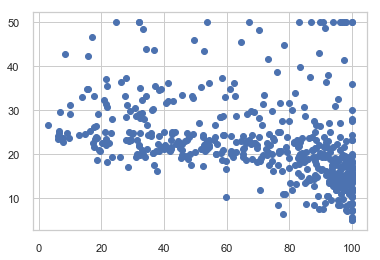

In [16]:
plt.scatter(x='AGE', y='Target', data=boston)

From the plot above, we can see that there's no much linear relationship between variable **`Age`** and **`Target`**.

If we simply model the two variable with a linear relationship, we can hardly get a good result.

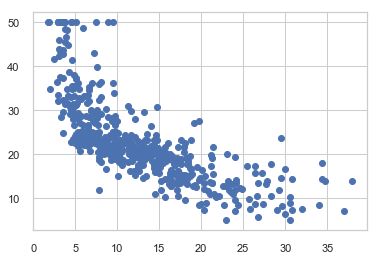

In [12]:
plt.scatter(x='LSTAT', y='Target', data=boston)

From the plot above, we can see that there's a better linear relationship between variable **`LSTAT`** and **`Target`**.

Thus, it's better to model these two variables with a linear relationship.

However, this approach is extremely unefficient if we have multiple features, such as the given boston data set. It is even harder to d**istinguish the interacting relationship between variables.** Therefore, **for high-dimensional mutually-interacting data set, you can draw completely wrong conclusions if you only try to look at the relationship between two variables at a time**. Worse yet, there is no easy way to visualize more than 2 variables at a time. 

On top of this, one should realize that **`Linear`** regression model doesn't only imply fitting with a straight line. **Linear**, on the other hand, refers to the coefficients, the parameters that you are estimating (e.g. 𝛽), not to the degree of the features. Polynomial or logarithmic relationships are common relationship that can be transformed to a linear relationship, but hard to distinguish only via visualization.
> $y=e^{x}\beta + \epsilon$ is a linear model, but $y=e^{x\beta} + \epsilon$ is not.

In later notebooks we will talk more about how to fit polynomial relationship and how to automatically choose the order of degree.

## 2. Little or no Multicollinearity among features

**`Multicollinearity`** refers to the case in which two or more explanatory variables in the regression model are highly correlated with one another, making it difficult or impossible to isolate their individual effects on the dependent variable. It is therefore a type of disturbance in the data, if present, weakens the statistical power of the regression model. 

In this case, the estimated OLS coefficients may be **`statistically insignificant`** (and even have the wrong sign) even though R² may be "high".

Two or more independent variables are perfectly collinear if one or more of the variables can be expressed as a linear combination of the other variable(s).

High, but not perfect, multicollinearity refers to the case in which two or more independent variables in the regression model are highly correlated.

**Pair Plots** `sns.pairplot` and **Heatmaps** `sns.heatmap` can be used for identifying highly correlated features.

Text(0.5, 1.0, 'Correlation among features')

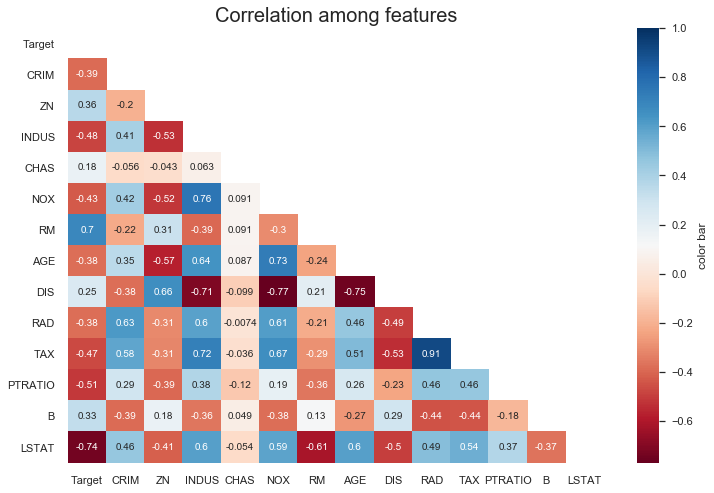

In [62]:
plt.figure(figsize = (12,8))
corr = boston.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #mask

sns.heatmap(corr, annot=True, cmap='RdBu', 
            mask = mask,
            annot_kws={"size":10}, cbar_kws={"label":"color bar"})
plt.title('Correlation among features',fontsize=20)

Text(0.5, 1.0, 'Grid Pairplot')

<Figure size 576x432 with 0 Axes>

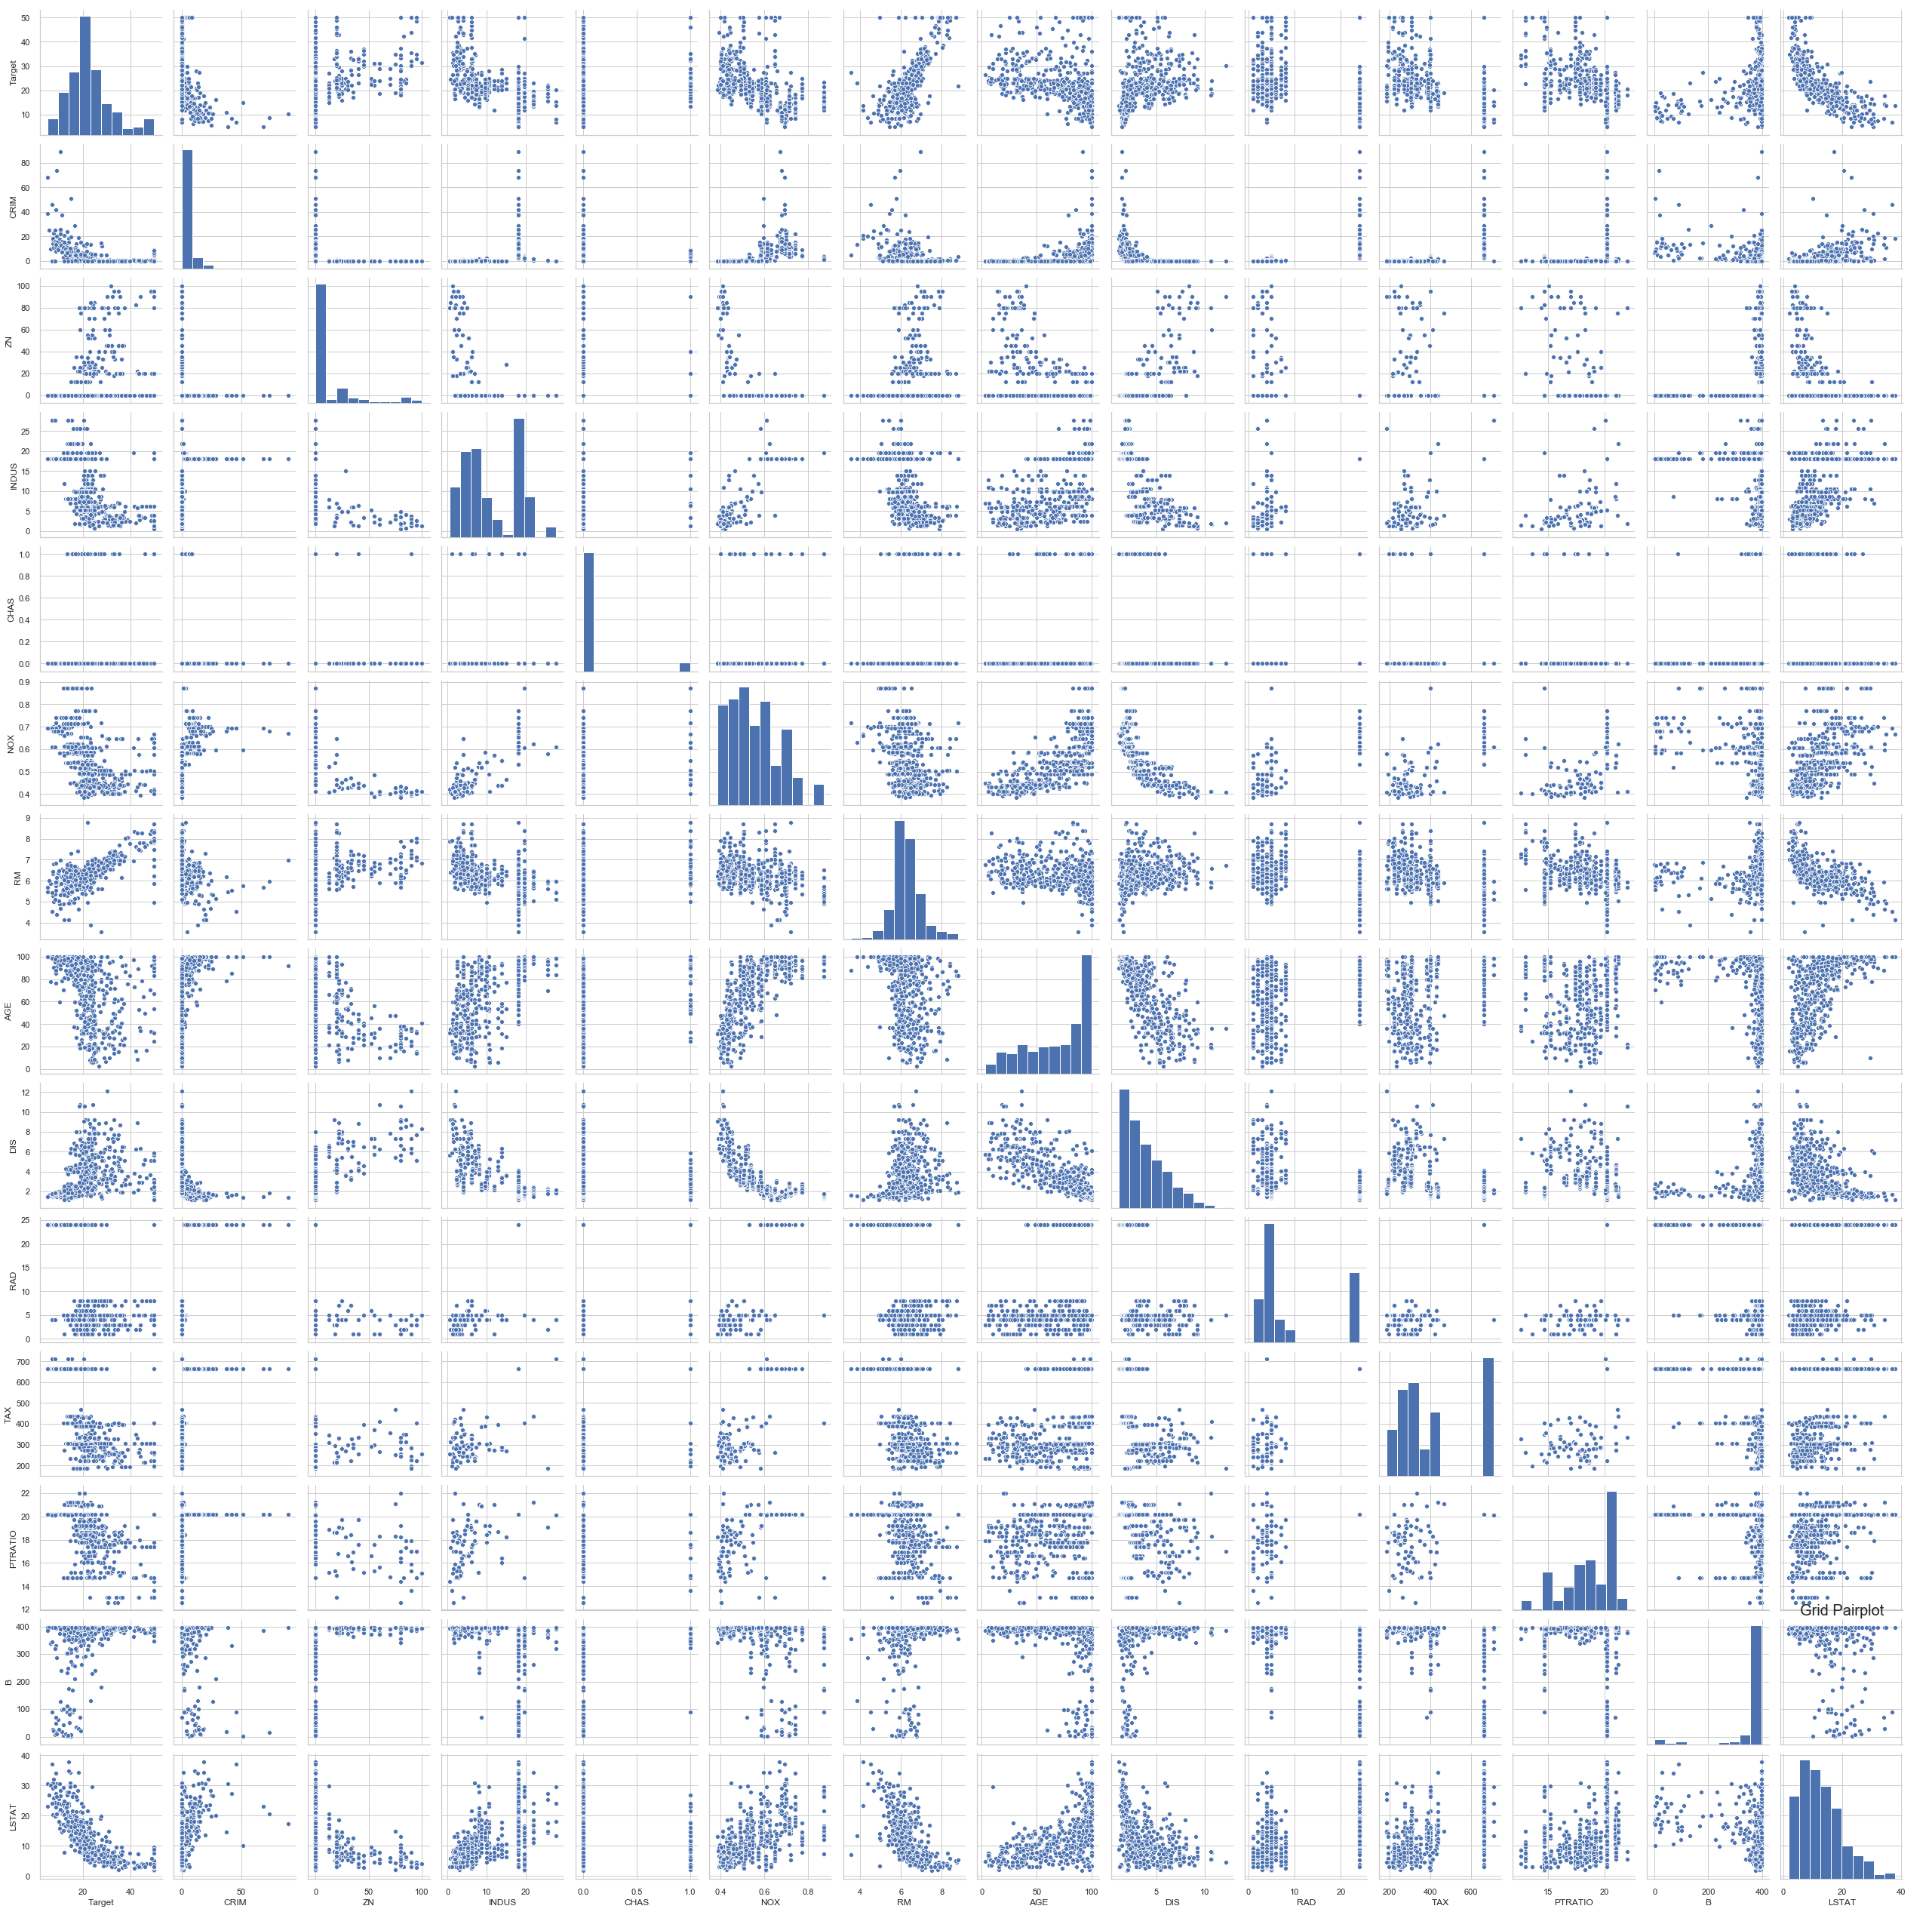

In [63]:
plt.figure(figsize = (8,6))
sns.pairplot(boston)
plt.title('Grid Pairplot', fontsize=20)

**Why Multicollinearity is a problem?**

The coefficients derived from the models represent the mean change for each unit change in its respective feature, holding all else constant.

However, when features are highly inter-correlated, changes in one feature will affect another features. The stronger the correlation, the more difficult it is to isolate the respective effect of the feature because those features tend to change in unison.

**How to tackle multicollinearity problem?**


1. **Drop one of the highly collinear variables** 

*(However, this may lead to specification bias or error if theory tells us that the dropped variable should be included in the model).*

Note that you should only remove variables one at a time. If you remove all the highly correlated variables in one time, you might have missed a significant variables that cause low predicting power.

2. Use regularization to **smoothen** the coefficient.


3. **Increase size of the dataset** to remove multicollineatrity that happens by chance.


4. Re-formulate the function **utilizing a priory information**. 

*(For example, we may know from a previous study that **`b2=0.25b1`**. Therefore, we can change b2 into b1)*

---

## 3. Homoscedasticity

<img src='pic/loghet.png' width="600" height="200">

**`Homoscedasticity`** describes a situation in which the error term (the “noise” in the relationship between the features and the target) is the same across all independent variables. 

Ideally, residuals are randomly scattered around 0 (the horizontal line), providing a relatively even distribution with no clear pattern. 

**`Heteroscedasticity`** is said that a linear regression model presents heteroscedasticity when the variance of the perturbations is not constant throughout the observations. That is, the residuals are not evenly scattered around the line and shows a specific pattern, be it a bow-tie or fan shape pattern.

<img src='pic/hetero.png' width="800" height="200">

Note that while heteroscedasticity does not cause bias in the coefficient estimates, it does **make coefficient estimates less precise**. 

Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

**`Heteroscedasticity`** can invalidate statistical tests of significance that assume that the modelling errors are uncorrelated and uniform—hence that their variances do not vary with the effects being modeled. 

In this case, **Ordinary Least Squared (OLS) estimators are not the Best Linear Unbiased Estimators (BLUE)** and their variance is not the lowest of all other unbiased estimators.

**When does heteroscedasticity happen?**

A common form of heteroscedasticity is when the amount of fluctuation is a fraction of the value. This happens commonly with monetary data such as:

* `Prices` (stock prices, prices of goods, medical procedure costs),


* `Expenditures` (household expenditure, employee wages, rents),


* `Price indexes` (the Gold Price Index example illustrated above).

**What will happen is the data is heteroscedastic?**

1. Heteroscedasticity can cause the OLS estimates of `the variance of the coefficients` to be biased. Therefore, the significant tests, such as t-tests and F tests, can be invalid. In certain cases, researchers **might fail to reject the null hypothesis** at a given significance level and thus make a **`typeII error`**.


2. OLS will not be the Best Linear Unbaised Estimators (BLUE) and the variance is not the lowest of all other unbiased estimators. Since the variance tends to increase as the dependent variable grows, an alternative technique which gives relatively high weight to the relatively low-variance observations should tend to yield more accurate estimates.


**Note that**

1. Regression analysis using heteroscedastic data will **still provide an unbiased estimate for the relationship between the predictor variable and the outcome**, but standard errors and therefore inferences obtained from data analysisare worth caution. 



2. In terms of bias-variance trade-off, this model will have `higher variance but not bias` compared to model trained with homoscedastic data. That is, heteroscedasticity will not cause the OLS estimates to be biased, but the variance of the estimates will be.

**How to detect Homoscedasticity?**

A scatter plot of residual values vs predicted values is a goodway to check for homoscedasticity.

```Python
## Python code for checking residual
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
visualizer = ResidualsPlot(lr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof
```

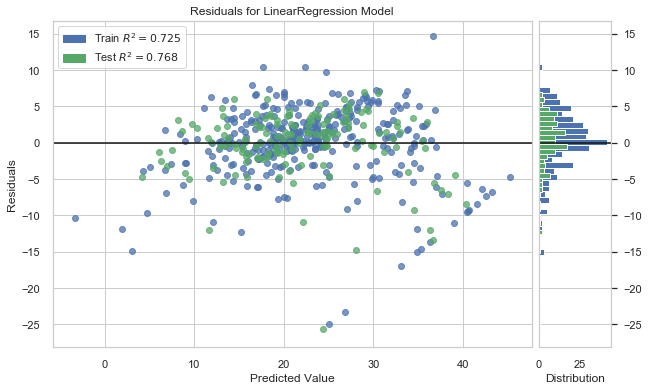

In [18]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(figsize=(10,6))
lr = LinearRegression(normalize = True)
visualizer = ResidualsPlot(lr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

From the plot above, we can see that the somehow even across all value. There are some outliers in the lower right part, but overall it's quite similar! Therefore, we can say that the data is homoscedastic.

Other common ways to detect heteroscedasticity is through **`Breusch-Pagan tests`** & **`White tests`**.

In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.api import OLS
import statsmodels.formula.api as smf

# Retrieve strings for the dependent variables
dep = ''
for col in boston.columns[1:]:
    dep += col
    dep += '+'

# Set the formula for OLS
f = f"Target~{dep.strip('+')}" # Remove the last "+" sign

mod = smf.ols(formula=f, data=boston).fit()
white_test = het_white(mod.resid, mod.model.exog)
bp_test = het_breuschpagan(mod.resid, mod.model.exog)

In [20]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('Statistics For Breusch-Pagan test')
print(dict(zip(labels, bp_test)))
print('\n')
print('Statistics For White test')
print(dict(zip(labels, white_test)))

Statistics For Breusch-Pagan test
{'LM Statistic': 65.12178613716186, 'LM-Test p-value': 6.265430719876314e-09, 'F-Statistic': 5.590226641705007, 'F-Test p-value': 1.4957755130733234e-09}


Statistics For White test
{'LM Statistic': 328.6124307877959, 'LM-Test p-value': 2.2661430073166336e-25, 'F-Statistic': 7.2301887294196305, 'F-Test p-value': 4.664584804432177e-48}


Heteroskedasticity is indicated if p <0.05. Therefore, according t othe two statistical tests, this boston housing dataset is is heteroskedastic.

We can also see this results in the `Prob (F-Statistic)` sesion below.

In [21]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        15:08:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Since Prob (F-Statistic) is extremely small, we can reach the same conclusion that this data is heteroscedasticity.

**How to correct Heteroscedasticity?**

1. **`Log-transform the y variable`** 

Although non-logarithmized series are growing exponentially, the variability in percentage terms may, however, be rather stable. Then, build the OLS regression model for log(y).

**Note that** some other transformations also apply. For example, `the squared root, cubic root, or box-cox transformation`.


2. **`Use a Weighted Least Squares (WLS)`**

This estimation method, in which OLS is applied to transformed or weighted values of X and Y. The weights vary over observations, usually depending on the changing error variances. In one variation the weights are directly related to the magnitude of the dependent variable, and this corresponds to least squares percentage regression.



3. **`Implement Heteroscedasticity-Consistent Standard Errors (HCSE)`**


HCSE is a consistent estimator of standard errors in regression models with heteroscedasticity, which corrects for heteroscedasticity without altering the values of the coefficients. This method may be superior to regular OLS because if heteroscedasticity is present it corrects for it, however, if the data is homoscedastic, the standard errors are equivalent to conventional standard errors estimated by OLS.

For more information about this method, see `statsmodels documentations` for more detail.

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html


4. **`Accept the Heteroscedasticity!`** 

Small heteroscedasticity doesn't necessarily affect the result that much. As discussed, heteroscedasticity only affects the variation of coefficient estimates. Since the estimate itself is not biased, we can still use the result directly when heteroscedasticity is small.

---

## 4. Normal Distribution of Error Terms

In general, error terms in the regression model should be normally distributed. However, this assumption is often ignored due to **`Central Limit Theorem`**.

According to Central Limit Theorem, **no matter what the original distribution of the population is**, as sample size increases (repeated sampling), the coefficient (error term) derived from the ordinary least squares estimates will follow a normal distribution. 

Therefore, for large sample sizes, non-normality of residuals will not adversely affect the usual inferential procedures. 

One good way to detect the error term distribution is through the **`Q-Q Plot`**.

<img src='pic/qqplot.png' width="300" height="150">

With this **`Q-Q`** plot, we can infer whether the data comes from a normal distribution. 

* If **`yes`**, the plot would show fairly straight line. 

* If **`no`**, the non-normality in the errors will show through the deviation from the straight line.

We can derive the above Q-Q plot with the help of `statsmodels`.

```python
from statsmodels.api import OLS, qqplot
mod = OLS(y_train, X_train).fit()
res = mod.resid # residuals
fig = qqplot(res, fit=True, line = '45')
plt.show()
```

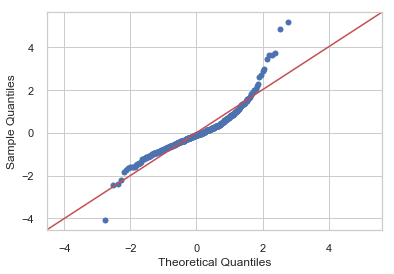

In [22]:
from statsmodels.api import OLS, qqplot
mod = OLS(y_train, X_train).fit()
res = mod.resid # residuals
fig = qqplot(res, fit=True, line = '45')
plt.show()

From the plot above, we can say that it's normally distributed.

## 5. Little or no Autocorrelation

**`Autocorrelation`**occurs when the residual errors are dependent on each other. 

The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. (for example, today's stock price is dependent on yesterday's closing price.)

In order to detect this Autocorrelation, we can implement the **`Durbin-Watson Test`** as formulated below.

<img src='pic/dw.png' width="400" height="150">

Note that the Durbin-Watson coefficient ranges between `0` and `4`, with **`2`** indicating no autocorrelation (no serial correlation).

* The closer to **`0`**, the more evidence for positive serial correlation. 


* The closer to **`4`**, the more evidence for negative serial correlation.

The Durbin-Watson coefficient is derived automatically when calling the following methods.

In [24]:
from statsmodels.api import OLS
mod = OLS(y_train, X_train).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              571.0
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                   2.10e-222
Time:                        15:12:19   Log-Likelihood:                         -1082.1
No. Observations:                 354   AIC:                                      2190.
Df Residuals:                     341   BIC:                                      2240.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Here the Durbin-Watson coefficient = `2.020`, which indicates that there is **no serial correlation**.

### End Note

These assumptions are just a formal check to ensure that **the linear model we build gives us the best possible results**.

If these assumptions are not satisfied, we can still build a Linear Regression model and derive some results.

In this day and age, lots of robust nonparametric methods come into life. People often turn to those models so that they don't have to take care of these assumptions.

But remember -- **`Garbage in, Garbage out!`**.

---

## Reference:

**Medium**:

[Assumptions of Linear Regression Algorithm](https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1)

[Heteroscedasticity is nothing to be afraid of](https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f)

[How to you check the quality of your regression model in python](https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685)

[Tests for heteroskedasticity in Python](https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab)

[The concept of heteroscedasticity](https://towardsdatascience.com/the-concept-of-heteroscedasticity-c5652b746223)

[Machine Learning with Python easy and robust method to fit nonlinear data](https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49)

**Others**:

[Wiki - OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares)

[Wiki - Heteroscedasticity](https://en.wikipedia.org/wiki/Heteroscedasticity)

[Application of Box-Cox Transformation as a Corrective Measure to Heteroscedasticity Using an Economic Data](http://article.sapub.org/10.5923.j.ajms.20180801.02.html#Sec2)

[Problems in Regression Analysis and their Corrections](https://www.oocities.org/qecon2002/founda10.html)

[What does linear stand for in linear regression](https://stats.stackexchange.com/questions/8689/what-does-linear-stand-for-in-linear-regression)